In [ ]:
# 1: Problem Framing & Planning
# The goal is to use historical transaction 
# data to build a machine learning model that 
# can accurately predict whether a given 
# transaction is fraudulent.

	# •	High recall (to catch as many fraudulent transactions as possible)
	# •	Without sacrificing too much precision (to reduce false alarms on genuine users)	
    # •	High recall (to catch as many fraudulent transactions as possible)
	# •	Without sacrificing too much precision (to reduce false alarms on genuine users)

In [4]:
# 2. EDA, PROCESSING AND CLEANING

import pandas as pd

df = pd.read_csv("fraud_detection_dataset.csv")

print("Shape: ",df.shape)
print("\n Data Types: \n",df.dtypes)
print("\n Sample Rows: \n", df.head(10))

Shape:  (62301, 7)

 Data Types: 
 user_id                 object
device_id               object
transaction_time        object
amount                 float64
transaction_country     object
home_country            object
is_fraud                 int64
dtype: object

 Sample Rows: 
      user_id                             device_id  \
0  user_1480  0075d3d5-ba94-4a66-ad7e-4a452099e71f   
1  user_1068  cb80f288-446f-44dd-9abc-a6e5d0b1e3eb   
2  user_1908  913a1734-ccb6-4571-abc5-35452e6d7a04   
3  user_2195  26f341c8-04f7-48c8-9215-b5033012f819   
4  user_3708  eb821435-382a-4bde-bef5-50110acd1ac7   
5  user_4832  16daa8f5-be8e-466f-b4d0-91d15c02f1da   
6  user_1802  21f6c63d-ac20-4f11-abd3-3927586528e6   
7  user_1912  402d105b-113e-4f84-abf3-90964a68369c   
8  user_3398  938f2b90-6c08-4d6c-84de-78f8873f3f03   
9  user_4338  00ebf725-2f1e-48dc-b4f9-02b74580a4ae   

             transaction_time  amount transaction_country home_country  \
0  2025-03-15 16:05:58.363600   65.03           

In [4]:
print("Is Null: ", df.isnull().sum())

Is Null:  user_id                0
device_id              0
transaction_time       0
amount                 0
transaction_country    0
home_country           0
is_fraud               0
dtype: int64


In [6]:
fraud_counts = df['is_fraud'].value_counts()
fraud_rate = df['is_fraud'].mean()

print(f"Fraud Count: \n{fraud_counts}")
print(f"Fruad Rate: \n{fraud_rate}")

Fraud Count: 
is_fraud
0    40614
1    21687
Name: count, dtype: int64
Fruad Rate: 
0.34810035151923724


In [12]:
df.describe(include='all')

,user_id,device_id,transaction_time,amount,transaction_country,home_country,is_fraud
count,62301,62301,62301,62301.000000,62301,62301,62301.000000
unique,5000,11296,62301,NaN,7,7,NaN
top,user_4621,f01a5097-9ed0-4e5f-b3bc-57914882f6eb,2025-03-15 16:05:58.363600,NaN,IE,CN,NaN
freq,20,20,1,NaN,8998,9233,NaN
mean,NaN,NaN,NaN,49.909031,NaN,NaN,0.348100
std,NaN,NaN,NaN,49.871904,NaN,NaN,0.476372
min,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000
25%,NaN,NaN,NaN,14.400000,NaN,NaN,0.000000
50%,NaN,NaN,NaN,34.890000,NaN,NaN,0.000000
75%,NaN,NaN,NaN,69.000000,NaN,NaN,1.000000


In [8]:
df.head(50)

df['transaction_time'] = pd.to_datetime(df['transaction_time'])
df = df.sort_values(by='transaction_time')

df.head(50)

,user_id,device_id,transaction_time,amount,transaction_country,home_country,is_fraud
17849,user_2160,205c8491-a061-49db-b172-f63648bfb602,2024-08-08 13:52:43.726378,25.33,IN,DE,1
39607,user_3239,5e1b015f-6a1c-401b-959b-2b6b32dba028,2024-08-08 13:54:05.490812,136.82,CN,DE,0
508,user_1993,21d8b96a-62ad-4157-a0d2-759a3ad51382,2024-08-08 14:02:46.081939,61.74,IN,DE,1
52389,user_3999,311f5d4a-c258-4de2-8f26-54892ec75a83,2024-08-08 14:02:47.344975,24.88,UK,FR,1
43993,user_2529,d73aae7b-47cc-4a66-a638-d8bef83893a2,2024-08-08 14:06:59.712967,7.40,US,FR,1
5985,user_737,15260718-cd18-4a82-8447-ceab84ef4324,2024-08-08 14:10:55.788324,21.09,UK,DE,0
39284,user_3001,4aaa7f99-4a34-441e-8c78-947b5b21c9f0,2024-08-08 14:21:35.711259,12.03,CN,US,1
5888,user_2884,0a76bd91-9e7f-47a7-b721-5daa5d975cdc,2024-08-08 14:29:15.957128,29.12,IE,FR,0
54660,user_4659,e9a7f5e0-5c84-48db-9839-40c97e86d7f8,2024-08-08 14:31:18.015171,102.13,CN,CN,0
29716,user_4065,5719d3e4-16d1-4768-9c83-90ba1672380e,2024-08-08 14:48:25.746073,0.85,US,FR,0


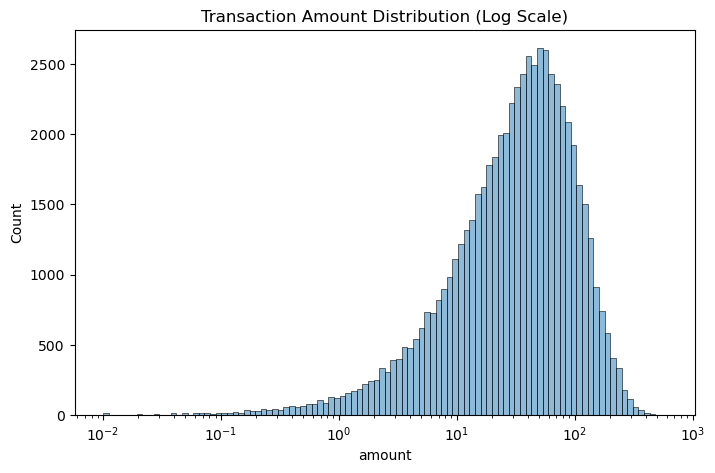

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['amount'], bins=100, log_scale=True, kde= True)
plt.title("Transaction Amount Distribution (Log Scale)")
plt.show()

#Use histogram to range the amount distribution when you have 
# a large dataset, and log the values when the feature has
#high variance

 

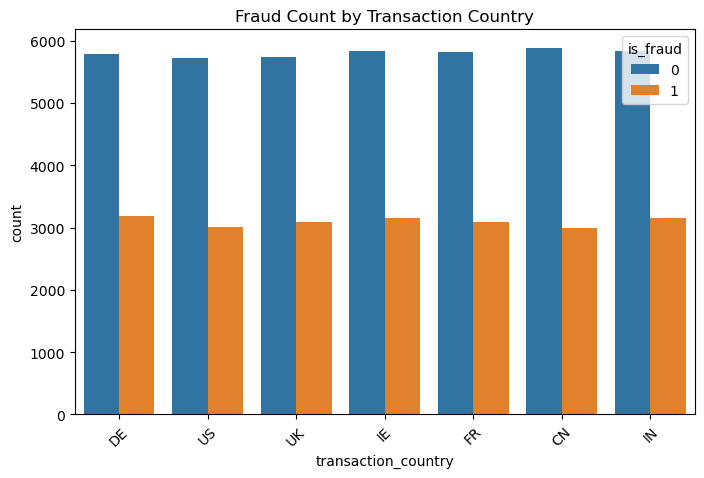

In [8]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='transaction_country',hue='is_fraud')
plt.title("Fraud Count by Transaction Country")
plt.xticks(rotation=45)
plt.show()

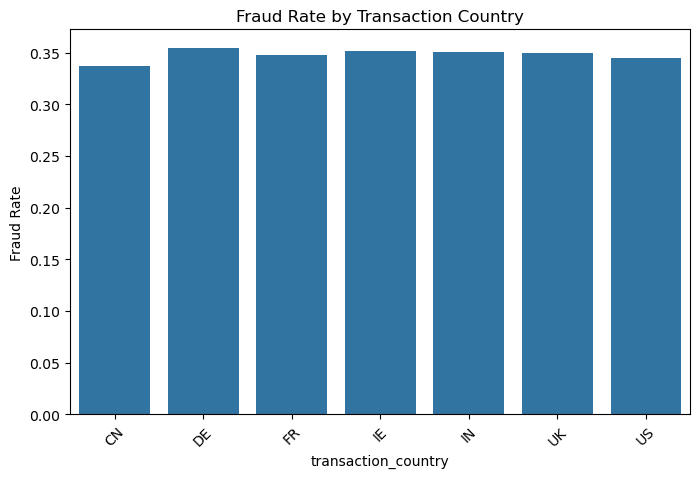

In [14]:
fraud_rate = (
    df.groupby('transaction_country')['is_fraud']
    .mean()
    .reset_index()
)

plt.figure(figsize=(8, 5))
sns.barplot(data=fraud_rate, x='transaction_country', y='is_fraud')
plt.title("Fraud Rate by Transaction Country")
plt.ylabel("Fraud Rate")
plt.xticks(rotation=45)
plt.show()

In [16]:
#Fraud by time of the day

df['hour'] = pd.to_datetime(df['transaction_time']).dt.hour

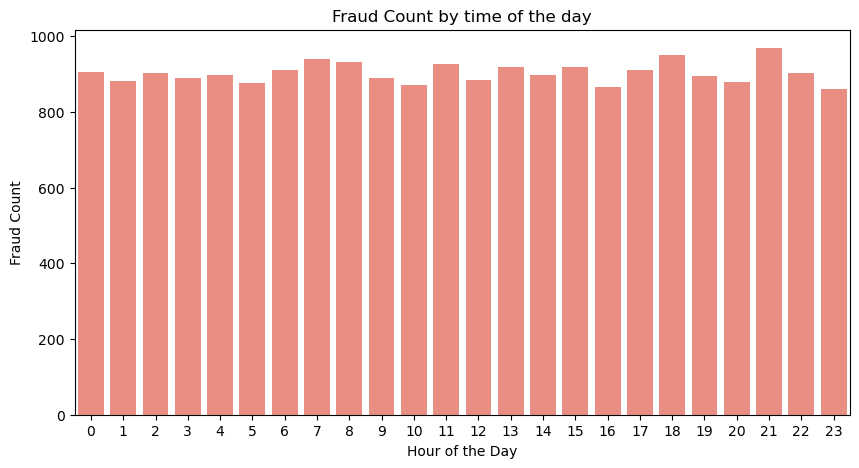

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(data=df[df['is_fraud'] == 1], x='hour',color='salmon')
plt.title("Fraud Count by time of the day")
plt.xlabel("Hour of the Day")
plt.ylabel("Fraud Count")
plt.show()

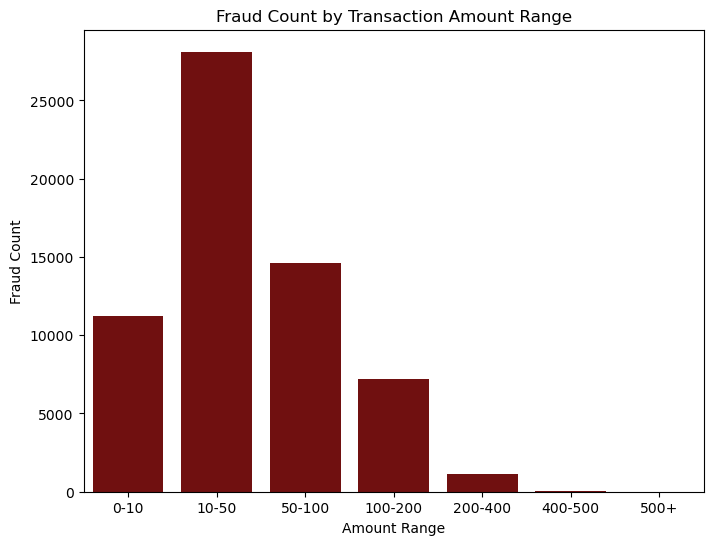

In [50]:
#Fraud by Transaction Amount Range


bins = [0, 10, 50, 100, 200, 400, 500, df['amount'].max()]
labels = ["0-10", "10-50", "50-100", "100-200", "200-400", "400-500", "500+"]

df['amount_bin'] = pd.cut(df['amount'], bins=bins, labels=labels, include_lowest=True)


plt.figure(figsize=(8, 6))
sns.countplot(data = df[df['is_fraud'] == 1], x= df['amount_bin'], color='maroon')
plt.title("Fraud Count by Transaction Amount Range")
plt.xlabel("Amount Range")
plt.ylabel("Fraud Count")
plt.show()

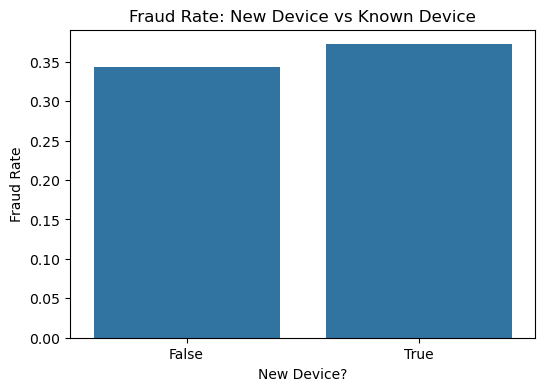

In [8]:
df['is_new_device'] = df['device_id'] != df.groupby('user_id')['device_id'].transform('first')

fraud_rate_device = df.groupby('is_new_device')['is_fraud'].mean().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(data=fraud_rate_device, x='is_new_device', y='is_fraud')
plt.title("Fraud Rate: New Device vs Known Device")
plt.ylabel("Fraud Rate")
plt.xlabel("New Device?")
plt.show()

In [12]:
#correlation heatmap for numeric features

numeric_cols = df.select_dtypes(include=['int64','float64']).columns
print(numeric_cols)

Index(['amount', 'is_fraud'], dtype='object')


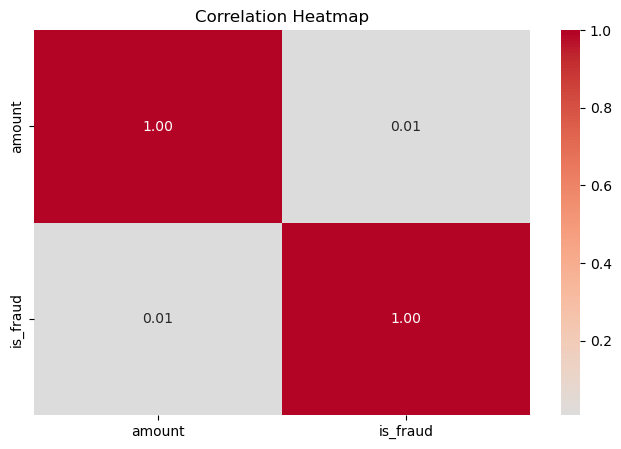

In [14]:
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(8,5))

sns.heatmap(corr_matrix, annot = True, fmt=".2f", cmap="coolwarm", center =0)
plt.title("Correlation Heatmap")
plt.show()

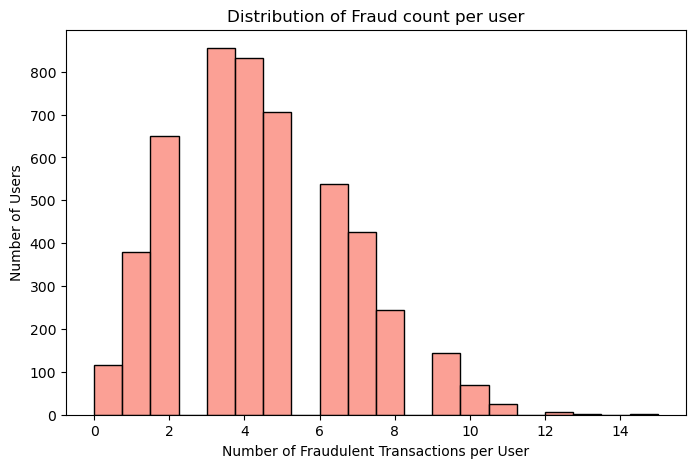

In [22]:
fraud_per_user = df.groupby('user_id')['is_fraud'].sum().reset_index()
fraud_per_user = fraud_per_user.sort_values('is_fraud', ascending=False)

#plot distribution
plt.figure(figsize=(8, 5))
sns.histplot(fraud_per_user['is_fraud'], bins=20, kde = False, color='salmon')
plt.title("Distribution of Fraud count per user")
plt.xlabel("Number of Fraudulent Transactions per User")
plt.ylabel("Number of Users")
plt.show()




In [24]:
print(fraud_per_user.head(10))

        user_id  is_fraud
4138  user_4722        15
1296  user_2164        13
4908   user_916        13
4698   user_727        12
4028  user_4623        12
1838  user_2652        12
4642   user_677        12
2996  user_3695        12
271   user_1241        12
1583  user_2422        12


In [10]:
# Feature Engineering
#1. temporal features

df['hour'] = df['transaction_time'].dt.hour
df['day_of_week'] = df['transaction_time'].dt.dayofweek



In [12]:
#2 location mismatch

df['is_foreign_transaction'] = df['transaction_country'] != df['home_country']

In [14]:
# flagging change of device
df = df.sort_values(['user_id', 'transaction_time'])
df['first_device'] = df.groupby('user_id')['device_id'].transform('first')
df['is_new_device'] = df['device_id'] != df['first_device']

In [38]:
print(df['first_device'].head(10))
print(df['is_new_device'].head(10))

50088    bdd640fb-0667-4ad1-9c80-317fa3b1799d
61322    bdd640fb-0667-4ad1-9c80-317fa3b1799d
45361    bdd640fb-0667-4ad1-9c80-317fa3b1799d
34318    bdd640fb-0667-4ad1-9c80-317fa3b1799d
6126     bdd640fb-0667-4ad1-9c80-317fa3b1799d
50363    bdd640fb-0667-4ad1-9c80-317fa3b1799d
19866    bdd640fb-0667-4ad1-9c80-317fa3b1799d
8088     bdd640fb-0667-4ad1-9c80-317fa3b1799d
23891    bdd640fb-0667-4ad1-9c80-317fa3b1799d
7434     bdd640fb-0667-4ad1-9c80-317fa3b1799d
Name: first_device, dtype: object
50088    False
61322    False
45361    False
34318    False
6126     False
50363     True
19866    False
8088     False
23891    False
7434      True
Name: is_new_device, dtype: bool


In [22]:

# flagging high amount transactions
import numpy as np
df['log_amount'] = np.log1p(df['amount'])
df['high_amount_flag'] = df['amount'] > 450
print(df['high_amount_flag'].head(10))

50088    False
61322    False
45361    False
34318    False
6126     False
50363    False
19866    False
8088     False
23891    False
7434     False
Name: high_amount_flag, dtype: bool


In [18]:
# Statistical Analysis

# 1. CHI SQUARE TEST FOR CATEGORICAL FEATURES AGAINST IS_FRAUD

from scipy.stats import chi2_contingency

categorical_features = ['is_foreign_transaction', 'is_new_device', 'transaction_country']

for col in categorical_features:
    contigency = pd.crosstab(df[col], df['is_fraud'])
    chi2, p, dof, ex = chi2_contingency(contigency)
    print(f"{col}: p-value: {p: .5f}")

is_foreign_transaction: p-value:  0.00000
is_new_device: p-value:  0.00000
transaction_country: p-value:  0.28532


In [ ]:
# # n Fraud Analysis Context
# 	•	Transaction amounts are usually highly skewed (most are small, a few are very large).
# 	•	That breaks the t-test’s normality assumption.
# 	•	Mann–Whitney U is safer because it doesn’t assume normality — it works by ranking all values and comparing the sum of ranks between groups.

In [20]:
#t-test
#t-test assumes normality, without any skewness(unlike ours)
from scipy.stats import ttest_ind

fraud_amounts= df[df['is_fraud'] == 1]['amount']
not_fraud_amounts = df[df['is_fraud'] == 0]['amount']

t_stat, p_val = ttest_ind(fraud_amounts, not_fraud_amounts, equal_var= False)
print(f"T-test → t-statistic: {t_stat:.4f}, p-value: {p_val:.5f}")

T-test → t-statistic: 1.9432, p-value: 0.05200


In [59]:
#Mann-Whitney U test- can deal with skewed data and ordinal features
from scipy.stats import mannwhitneyu

u_stat, p_val_mw = mannwhitneyu(fraud_amounts, not_fraud_amounts,alternative='two-sided')
print(f"Mann–Whitney U → U-statistic: {u_stat}, p-value: {p_val_mw:.5f}")

Mann–Whitney U → U-statistic: 444595175.5, p-value: 0.04967


In [ ]:
	# The t-test is looking at mean difference. If most fraud and non-fraud transactions have similar average amounts, it won’t flag them.
	# •	The Mann–Whitney test ignores means — it ranks all values and checks if fraud transactions tend to be larger/smaller overall.
	# •	In skewed data (like ours), differences often show up in distribution shape rather than the mean.

In [65]:
#ANNOVA for more than 3 groups(parametric): to see if avg transaction amount differs by day of week
from scipy.stats import f_oneway

groups = [df[df['day_of_week'] == d]['log_amount'] for d in df['day_of_week'].unique()]
f_stat, p_val = f_oneway(*groups)
print(f"ANOVA → F-statistic: {f_stat:.4f}, p-value: {p_val:.5f}")

ANOVA → F-statistic: 1.3167, p-value: 0.24554


In [67]:
from scipy.stats import kruskal
#Kruskal Wallis is non-parametric test like MWU test only for more than 3 groups
groups = [df[df['day_of_week'] == d]['amount'] for d in df['day_of_week'].unique()]
h_stat, p_val = kruskal(*groups)
print(f"Kruskal–Wallis → H-statistic: {h_stat:.4f}, p-value: {p_val:.5f}")

Kruskal–Wallis → H-statistic: 6.7912, p-value: 0.34059


In [ ]:
#all the 3+ groups involving test who reject null hypothesis need to have a 
#post hoc test to identify which group differs from rest
#it only tells that at least one group differs out of all
#in our case we fail to reject null hypothesis so thats not our case

In [30]:
#lets finally test using t-test on log amount to see if p-value reduces with lesser skewness

log_fraud_amounts = df[df['is_fraud'] == 1]['log_amount']
not_log_fraud_amounts = df[df['is_fraud'] == 0]['log_amount']

t_test, p_val = ttest_ind(log_fraud_amounts,not_fraud_amounts, equal_var=False)
print(f"T-test → t-statistic: {t_test:.4f}, p-value: {p_val:.5f}")

T-test → t-statistic: -186.9687, p-value: 0.00000


In [34]:
print(df['log_amount'].head(10))
# #	•	t-statistic = -186.97 → The negative sign means fraud transactions have a lower mean log_amount compared to non-fraud (in log scale).
# 	•	p-value = 0.00000 → The difference is statistically significant at any usual threshold (0.05, 0.01, etc.).
# 	•	This tells us: even after adjusting for skewness, there’s a clear, consistent difference in transaction amount between fraud and non-fraud cases.

50088    4.150725
61322    4.406963
45361    3.418710
34318    2.494857
6126     2.714695
50363    3.462606
19866    4.553456
8088     3.514526
23891    4.765502
7434     2.350422
Name: log_amount, dtype: float64


In [58]:
# Regression Analysis

#To make a logistics model we first need to use One-Hot encoding
#as it processes the model to handel categorical features like country
#if there were no categorical features we would have directly evaluated
#them in the logistic regression model

from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
from sklearn.preprocessing import OneHotEncoder


# Selected features
features = ['log_amount', 'is_foreign_transaction', 'is_new_device', 
            'hour', 'transaction_country', 'high_amount_flag']


X = df[features].copy()

#convert boolean to integers

bool_cols =['is_foreign_transaction', 'is_new_device', 'high_amount_flag']
X[bool_cols] = X[bool_cols].astype(int)

# One-hot encode categorical
X = pd.get_dummies(X, columns=['transaction_country'], drop_first=True)
y = df['is_fraud']

# Ensure numeric dtype for all columns
X = X.astype(float)

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data.sort_values(by="VIF", ascending=False))

                   Feature       VIF
0               log_amount  6.482728
1   is_foreign_transaction  5.326889
3                     hour  3.334082
7   transaction_country_IE  1.733839
8   transaction_country_IN  1.732311
5   transaction_country_DE  1.728184
6   transaction_country_FR  1.723967
9   transaction_country_UK  1.719420
10  transaction_country_US  1.708100
2            is_new_device  1.203490
4         high_amount_flag  1.000649


In [56]:
# No features here have VIF high enough to require removal.(removal when VIF >10)
# We can keep all of them in the logistic regression model.


In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40, stratify=y)


In [62]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [64]:
import numpy as np
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0],
    "Odds_Ratio": np.exp(model.coef_[0])
})
print(coef_df.sort_values(by="Odds_Ratio", ascending=False))

                   Feature  Coefficient  Odds_Ratio
1   is_foreign_transaction     2.837216   17.068178
2            is_new_device     0.110162    1.116459
5   transaction_country_DE     0.090242    1.094439
8   transaction_country_IN     0.069903    1.072404
9   transaction_country_UK     0.063559    1.065623
10  transaction_country_US     0.062299    1.064280
6   transaction_country_FR     0.051031    1.052356
7   transaction_country_IE     0.046395    1.047488
0               log_amount     0.020764    1.020981
4         high_amount_flag     0.009888    1.009937
3                     hour     0.002923    1.002928


In [ ]:
#HUGE effect — if a transaction is foreign,
# odds of being fraud increase 
# ~17× compared to local transactions.


In [66]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

           0       0.65      1.00      0.79     12185
           1       0.00      0.00      0.00      6506

    accuracy                           0.65     18691
   macro avg       0.33      0.50      0.39     18691
weighted avg       0.42      0.65      0.51     18691

ROC-AUC: 0.6001812032729865


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [70]:
import xgboost as xgb

# Calculate imbalance ratio
ratio = y_train.value_counts()[0] / y_train.value_counts()[1]

# Create XGBoost model
model_xgb = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    scale_pos_weight=ratio,
    eval_metric="logloss",
    use_label_encoder=False,
    random_state=42
)

print(ratio)

1.87266978459917


In [72]:
model_xgb.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:38:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

In [74]:
y_pred_x = model_xgb.predict(X_test)
y_prob_x = model_xgb.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

           0       0.65      1.00      0.79     12185
           1       0.00      0.00      0.00      6506

    accuracy                           0.65     18691
   macro avg       0.33      0.50      0.39     18691
weighted avg       0.42      0.65      0.51     18691

ROC-AUC: 0.6001812032729865


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


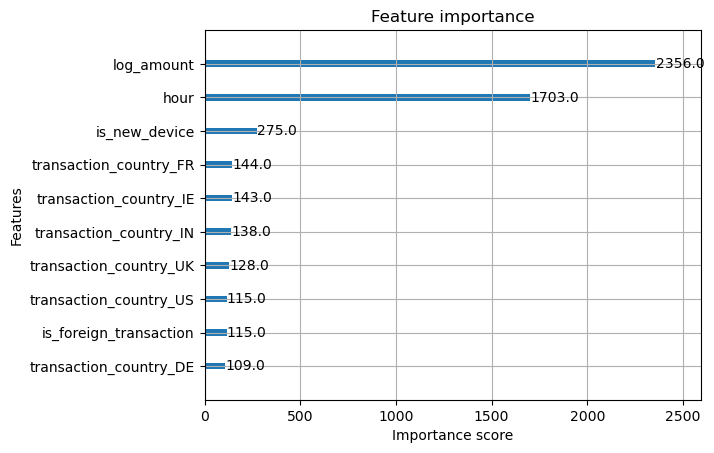

In [76]:
import matplotlib.pyplot as plt

xgb.plot_importance(model_xgb, importance_type='weight', max_num_features=10)
plt.show()